In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\ASUS\anaconda3\envs\python_primary\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
df_US = df[df['job_country'] == 'United States']

df_US_explode = df_US.explode('job_skills')

df_skills_count = df_US_explode.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)


In [40]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

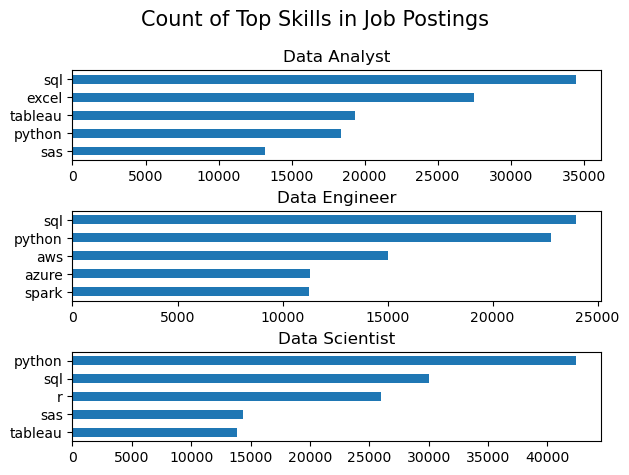

In [41]:
fig, ax=plt.subplots(len(job_titles), 1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().remove()

plt.suptitle('Count of Top Skills in Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()

In [42]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='job_total')

In [45]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skills_percent'] = 100*df_skills_perc['skill_count'] / df_skills_perc['job_total']

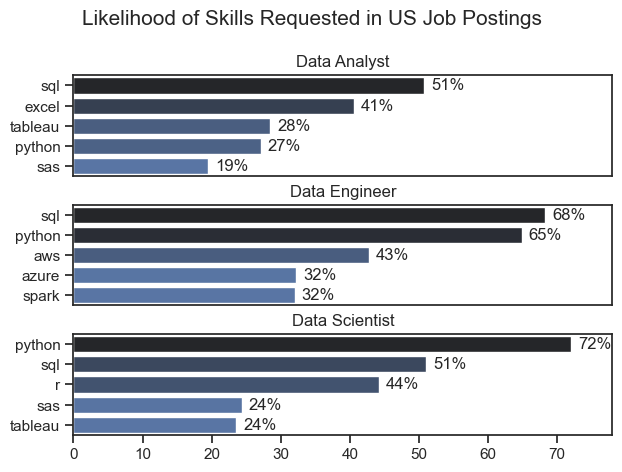

In [72]:
fig, ax=plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    #df_plot.plot(kind='barh', x='job_skills', y='skills_percent', ax=ax[i], title=job_title)
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skills_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')
    if i != len(job_titles)-1:
        ax[i].set_xticks([])

plt.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()